In [ ]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'mejiro':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [13]:
import sys
import os
import json

from astropy.io import fits
from pprint import pprint
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['image.origin'] = 'lower'
import numpy as np
from astropy.wcs import WCS
from astropy.table import Table
import astropy.wcs.utils

# the first pandeia import is required to run calculations. the others are provided to allow setting up calculations and loading/saving of inputs or results.
from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import get_telescope_config, get_instrument_config, build_default_calc, \
    build_default_source
from pandeia.engine.io_utils import read_json, write_json

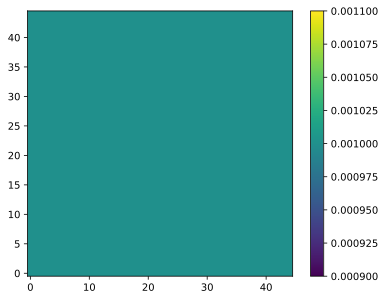

In [14]:
model = np.ones((45, 45)) * 0.001

plt.imshow(model)
plt.colorbar()

In [15]:
calc = build_default_calc('roman', 'wfi', 'imaging')

# don't allow scene size to change
calc['configuration']['dynamic_scene'] = True
calc['configuration']['max_scene_size'] = 5

# change filter
calc['configuration']['instrument']['filter'] = 'f106'

In [16]:
# calculate arcsec value of bottom-right corner
offset = (45 / 2) * 0.11

In [17]:
def pixel_to_arcsec(pixel_value):
    return pixel_value * 0.11

In [18]:
i = 0

for row_number, row in tqdm(enumerate(model)):
    for item_number, item in enumerate(row):
        if i != 0:
            calc['scene'].append(build_default_source(geometry="point"))
        calc['scene'][i]['position']['x_offset'] = pixel_to_arcsec(item_number) - offset  # arcsec
        calc['scene'][i]['position']['y_offset'] = pixel_to_arcsec(row_number) - offset  # arcsec
        calc['scene'][i]['spectrum']['normalization']['norm_flux'] = item

        i += 1

45it [00:10,  4.37it/s]


In [19]:
# pprint(calc)

In [20]:
results = perform_calculation(calc)

detector = results['2d']['detector']

print(detector.shape)

(45, 45)


In [21]:
pprint(detector)

array([[4.17798447, 5.00978428, 5.26827506, ..., 5.16017198, 4.73011476,
        2.75809505],
       [6.66163564, 8.3423181 , 8.83491014, ..., 8.69004663, 7.88183866,
        4.71519849],
       [7.37696823, 9.43163296, 9.55189416, ..., 9.45906384, 8.90382214,
        5.16774296],
       ...,
       [7.51992085, 9.40315086, 9.71457311, ..., 9.66353524, 8.91975004,
        5.62544866],
       [7.01474038, 9.12040787, 9.50205318, ..., 9.52265201, 8.53153735,
        5.19874678],
       [5.62025491, 7.05235637, 7.42368063, ..., 7.63820845, 6.74780853,
        3.95328387]])


In [22]:
# pprint(results)

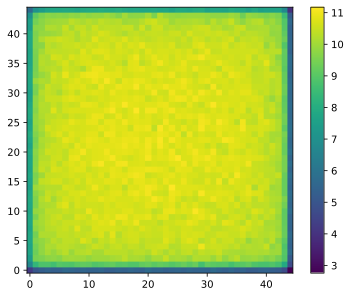

In [23]:
plt.imshow(detector)
# plt.title('Pandeia simulation (F106)')
plt.colorbar()
# plt.savefig('figures/pandeia.png')

In [24]:
# save this numpy array
# np.save('detector', detector)